In [29]:
import numpy as np

def rule3(errA, errB):
    """
    If Q = A+B, errQ = sqrt(errA**2+errB**2)
    errA: The error in quantity A
    errB: The error in quantity B
    """
    errQ = np.sqrt(errA**2+errB**2)
    return errQ

def rule4(Q, A, errA, expA, B, errB, expB):
    """
    Q: The function that calculates the value that needs it's error determined.
    A: The function that calculates the value for A
    errA: The error in quantity A
    expA: The power (exponent) of quantity A
    ...and so on and so forth.
    """
    errQ = np.abs(Q) * np.sqrt((expA*(errA/A))**2+(expB*(errB/B))**2)
    return errQ

Unknown Resistor:

1.  Begin  by  setting  up  the  circuit  shown  in  Figure  3  using  the  resistor  wrapped  with  BLACK  ELECTRICAL TAPE, not masking tape.  Be sure to verify each connection before supplying power to the circuit.


2.  Measuring Voltage:  Adjust the variable voltage supply and take readings of voltage for $V$ on the digital voltmeter roughly equal to $0.25V, 0.5V, 1.0V, 2.0V, 3.0V, 4.0V, 5.0V, 6.0V, 7.0V, 8.0V, 9.0V,$ and $10.0V$.


3.  Measuring Current: Take readings of current on the digital current meter for each corresponding voltage above.


4.  Determining Resistance: Use your Python code to plot your results with $V$ on the y axis andion the x axis.  Use the precision of the voltmeter to determine your $δV$.  Your code will calculate the slope and error of the best fit line in order to find the resistance $R$.


5.  Using the multimeter as an ohmmeter, measure the ”accepted” resistance of the resistor.


6.  State your result with uncertainty and the accepted resistance.  Does your result agree with the accepted value?

In [34]:
voltage = np.array([0.255, 0.501, 1.01, 1.996, 3.001, 3.998, 5.002, 6.004, 7.01, 8.0, 9.0, 10.0]) # Volts
errV = np.array([   0.05,   0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]) # Volts
current = np.array([0.003, 0.006, 0.013, 0.025, 0.038, 0.050, 0.063, 0.075, 0.088, 0.100, 0.112, 0.125]) # Ohms

#Actual 80.2

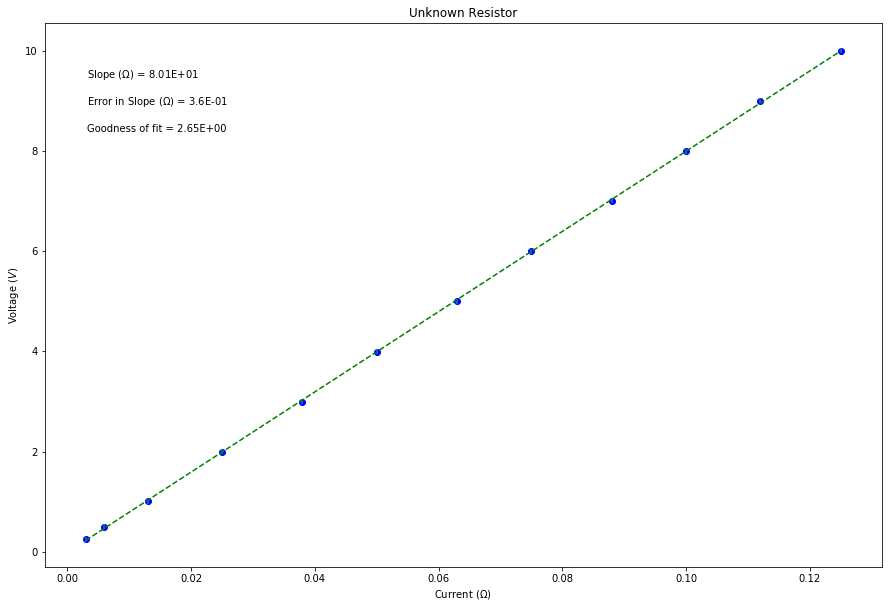

In [37]:
from __future__ import division
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = current   #this should be the array you want to plot on the x axis
y = voltage
dy = errV  #this should be your error in y array

b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Current $(\Omega)$')
plt.ylabel('Voltage $(V)$')
plt.title('Unknown Resistor')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope ($\Omega$) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope ($\Omega$) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

#plt.savefig('Unknown Resistor Plot', dpi=300)

plt.show()

$V = IR$


1. Three important facts can be learned from the following exercise with resistors in series:

    (a)  In a series connection, the current is the same in all parts of the circuit (to within the uncertainty of the meter).

    (b)  The voltages across two resistors in series are not necessarily equal.

    (c)  Resistors in series act like one resistor with $R_{total}=R_1+R_2+...$


2. Place one 100 Ω resistor and one 25 Ω resistor in series with each other (see figure 4).  Connect two ammeters in series with, and on either side of, the resistors, then plug the circuit into the variable voltage supply.  Dial the voltage up to 5 volts (DO NOT EXCEED 5V). Connect the voltmeter first across one resistor and then across the other, taking a reading for each connection.  Then connect the voltmeter across both resistors and record the total voltage.  Also record the ammeter readings.


3. Calculate $R_1$ from your measurements of $V_1$ and $I_1$.  Calculate $R_2$ from your measurements of $V_2$ and $I_2$, and calculate $R_{total}$ from your measurement of $V_{total}$ and what you infer from the facts known about resistors in series for $I_{total}$.  Compare your calculated $R_1$ and $R_2$ values to the values of $R_1$ and $R_2$ found by measuring resistance directly with your DMM. Compare your calculated $R_{total}$ to the addition of the $R_1$ and $R_2$ found by measuring resistance directly with your DMM. Your uncertainty in the direct measurement will be based on the precision of the meter.

In [41]:
V1 = 4.056 # Volts
errV1 = .0005
I1 = 0.041 # Amps
errI1 = .0005 # Amps

V2 = 0.977 # Volts
errV2 = .0005 # Volts
I2 = I1 #Amps
errI2 = errI1 #Amps

R1 = V1/I1 # Ohms
errR1 = rule4(R1, V1, errV1, 1, I1, errI1, 1) # Ohms
R2 = V2/I2 # Ohms
errR2 = rule4(R2, V2, errV2, 1, I2, errI2, 1) # Ohms

Rtotal = R1+R2 # Ohms
errRtotal = rule3(errR1, errR2) # Ohms

VtotalMeasured = 5.058 # Volts
errVtotalMeasured = 0.0005 # Volts
Vtotal = V1+V2 # Volts
errVtotal = rule3(errV1, errV2) # Volts

Itotal = Vtotal/Rtotal # Amps
errItotal = rule4(Itotal, Vtotal, errVtotal, 1, Rtotal, errRtotal, 1) # Amps

print('V1:',V1,'plus or minus',errV1,'volts')
print('V2:',V2,'plus or minus',errV2,'volts')
print('V Total:',Vtotal,'plus or minus',errVtotal,'volts')
print('V Total (Measured):',VtotalMeasured,'plus or minus',errVtotalMeasured,'volts\n')

print('I1:',I1,'plus or minus',errI1,'Amps')
print('I2:',I2,'plus or minus',errI2,'Amps')
print('Itotal:',I1,'plus or minus',errItotal,'Amps\n')

print('R1:',I1,'plus or minus',errI1,'Ω')
print('R1:',I1,'plus or minus',errI1,'Ω')
print('R Total:',Rtotal,'plus or minus',errRtotal,'Ω')
print('R Actual: 124 plus or minus', (124*0.05),'Ω')

V1: 4.056 plus or minus 0.0005 volts
V2: 0.977 plus or minus 0.0005 volts
V Total: 5.033 plus or minus 0.0007071067811865475 volts
V Total (Measured): 5.058 plus or minus 0.0005 volts

I1: 0.041 plus or minus 0.0005 Amps
I2: 0.041 plus or minus 0.0005 Amps
Itotal: 0.041 plus or minus 0.0004145455470286124 Amps

R1: 0.041 plus or minus 0.0005 Ω
R1: 0.041 plus or minus 0.0005 Ω
R Total: 122.7560975609756 plus or minus 1.2410507470040422 Ω
R Actual: 124 plus or minus 6.2 Ω


Parallel Circuits

1. Three important facts can be learned from the following exercise with resistors in parallel:

      (a)  In a parallel connection,  the voltage across all resistors are equal (to within the uncertainty of the meter.)
    
      (b)  The currents through resistors in parallel are not necessarily equal.
    
      (c)  Resistors in parallel act like one resistor with $\frac{1}{R_{total}}={1}{R_1}+{1}{R_2}+...$
    
    
2. Now connect the 100 Ω resistor and 25 Ω resistor in parallel with each other (see figure 5).  Note that each resistor must be connected in series with its own ammeter in order to measure the amount of current flowing through each resistor individually.  Measure the voltage across each resistor in turn with the single voltmeter provided.  Record the ammeter readings for each resistor.


3. Calculate $R_1$ from your measurements of $V_1$ and $I_1$.  Calculate $R_2$ from your measurements of $V_2$ and $I_2$,  and calculate $R_{total}$ from what you infer from the facts known about resistors in parallel for $V_{total}$ and $I_{total}$.  Compare your calculated $R_1$ and $R_2$ values to the values of $R_1$ and $R_2$ found by measuring resistance directly with your DMM. Compare your calculated $R_{total}$ to the calculation of $R_{total}$ using the formula  given  in  the  facts  known  about  resistors  in  parallel  above  and  using  the  values  of $R_1$ and $R_2$ found by measuring resistance directly with your DMM. Your uncertainty in the direct measurement will be based on the precision of the meter.

In [54]:
pV1 = 4.973 # Volts
perrV1 = .0005
pI1 = 0.050 # Amps
perrI1 = .0005 # Amps

pV2 = 4.904 # Volts
perrV2 = .0005 # Volts
pI2 = 0.212 #Amps
perrI2 = .0005 #Amps

pR1 = pV1/pI1 # Ohms
perrR1 = rule4(pR1, pV1, perrV1, 1, pI1, perrI1, 1) # Ohms
pR2 = pV2/pI2 # Ohms
perrR2 = rule4(pR2, pV2, perrV2, 1, pI2, perrI2, 1) # Ohms

pRtotal = ((1/pR1)+(1/pR2))**(-1) # Ohms
perrRtotal = rule3(perrR1, perrR2) # Ohms

pVtotalMeasured = 5.056 # Volts
perrVtotalMeasured = 0.0005 # Volts
pVtotal = (pV1+pV2)/2 # Volts
perrVtotal = 0.5*rule3(perrV1, perrV2) # Volts

pItotal = pI1+pI2 # Amps
perrItotal = rule3(perrI1, perrI2) # Amps

print('V1:',pV1,'plus or minus',perrV1,'volts')
print('V2:',pV2,'plus or minus',perrV2,'volts')
print('V Total:',pVtotal,'plus or minus',perrVtotal,'volts')
print('V Total (Measured):',pVtotalMeasured,'plus or minus',perrVtotalMeasured,'volts\n')

print('I1:',pI1,'plus or minus',perrI1,'Amps')
print('I2:',pI2,'plus or minus',perrI2,'Amps')
print('Itotal:',pItotal,'plus or minus',perrItotal,'Amps\n')

print('R1:',pR1,'plus or minus',perrR1,'Ω')
print('R2:',pR2,'plus or minus',perrR2,'Ω')
print('R Total:',pRtotal,'plus or minus',perrRtotal,'Ω')

print('R Total (Measured): 19.35 plus or minus',(19.35*0.05),'Ω')

V1: 4.973 plus or minus 0.0005 volts
V2: 4.904 plus or minus 0.0005 volts
V Total: 4.9384999999999994 plus or minus 0.00035355339059327376 volts
V Total (Measured): 5.056 plus or minus 0.0005 volts

I1: 0.05 plus or minus 0.0005 Amps
I2: 0.212 plus or minus 0.0005 Amps
Itotal: 0.262 plus or minus 0.0007071067811865475 Amps

R1: 99.46 plus or minus 0.9946502701955094 Ω
R2: 23.132075471698112 plus or minus 0.054607736770195536 Ω
R Total: 18.767250799553047 plus or minus 0.9961481641378269 Ω
R Total (Measured): 19.35 plus or minus 0.9675000000000001 Ω
